In [4]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
# Define the neural network structure
input_size = 2
hidden_size = 2
output_size = 1

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(output_size)

In [7]:
# Forward propagation
def forward(X):
    global Z1, A1, Z2, A2
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A2

# Backward propagation
def backward(X, y, output, learning_rate):
    global W1, b1, W2, b2
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)
    
    hidden_error = output_delta.dot(W2.T)
    hidden_delta = hidden_error * sigmoid_derivative(A1)
    
    W2 += A1.T.dot(output_delta) * learning_rate
    b2 += np.sum(output_delta, axis=0) * learning_rate
    W1 += X.T.dot(hidden_delta) * learning_rate
    b1 += np.sum(hidden_delta, axis=0) * learning_rate


In [8]:
# Training the neural network
def train(X, y, epochs, learning_rate):
    for epoch in range(epochs):
        output = forward(X)
        backward(X, y, output, learning_rate)
        if (epoch + 1) % 1000 == 0:
            loss = np.mean(np.square(y - output))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')

# Sample data for a simple problem: XOR logic gate
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Training the neural network
epochs = 10000
learning_rate = 0.1
train(X, y, epochs, learning_rate)

# Test the neural network
output = forward(X)
print("Predicted Output:")
print(output)
print("True Output:")
print(y)

Epoch 1000/10000, Loss: 0.24442900063146195
Epoch 2000/10000, Loss: 0.20359789746437937
Epoch 3000/10000, Loss: 0.1534055786727196
Epoch 4000/10000, Loss: 0.046398486976845926
Epoch 5000/10000, Loss: 0.015626914962059073
Epoch 6000/10000, Loss: 0.008452488215754322
Epoch 7000/10000, Loss: 0.005615456282023927
Epoch 8000/10000, Loss: 0.004147590639251683
Epoch 9000/10000, Loss: 0.0032642383004088476
Epoch 10000/10000, Loss: 0.002679230486596711
Predicted Output:
[[0.05395132]
 [0.9505447 ]
 [0.95009809]
 [0.05355567]]
True Output:
[[0]
 [1]
 [1]
 [0]]


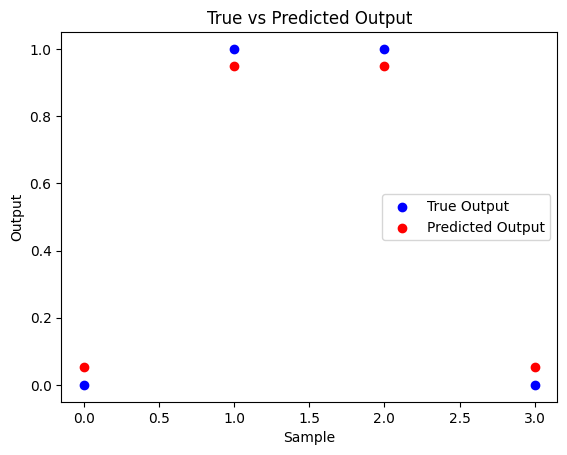

In [9]:
# Plot the predicted output against the true output
plt.scatter(range(len(y)), y, color='blue', label='True Output')
plt.scatter(range(len(output)), output, color='red', label='Predicted Output')
plt.title('True vs Predicted Output')
plt.xlabel('Sample')
plt.ylabel('Output')
plt.legend()
plt.show()